# Начальные преобразования

In [778]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Библиотека для кодирования признаков
import category_encoders as ce

# Библиотека для проверки корреляции между бинарными и 
from scipy.stats import pointbiserialr

# Для нормализации
from sklearn.preprocessing import MinMaxScaler

# Для стандартизации
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [779]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [862]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [781]:
# Подгрузим наши данные из соревнования

# DATA_DIR = '/kaggle/input/sf-booking/'
DATA_DIR = 'data'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [782]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [783]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [784]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [785]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [786]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [787]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [788]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True)  # объединяем

C:\Users\mrcho\AppData\Local\Temp\ipykernel_21200\1774497416.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True)  # объединяем


In [789]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [790]:
#Переведём столбец "review_date" к datetime
data['review_date'] = pd.to_datetime(data['review_date'])

In [791]:
data['review_date']

0        2017-07-21
1        2016-12-12
2        2015-11-26
3        2015-10-17
4        2016-05-16
            ...    
515733   2017-04-19
515734   2017-02-13
515735   2016-02-07
515736   2017-05-21
515737   2016-08-05
Name: review_date, Length: 515738, dtype: datetime64[ns]

In [792]:
# переведём признак "days_since_review" к int
data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split()[0]))

# Создание новых признаков

In [793]:
data['hotel_address'].apply(lambda x: x.split(' ')[-2] + ' ' + x.split(' ')[-1]).value_counts()

United Kingdom           262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: hotel_address, dtype: int64

Выделим новый признак "country".

In [794]:
data['country'] = data['hotel_address'].apply(lambda x: x.split()[-1])

Возможно, национальность проверяющего будет играть роль, ведь он может относиться предвзято к отелю, который находится в его стране. Создадим новый бинарный признак "is_nation", показывающий принадлежность нации рецензента к стране, в которой находится отель. 

In [795]:
# Существуют рецензенты, у которых не указана национальность. Это надо учесть.
min(data['reviewer_nationality'].value_counts().index)

' '

In [796]:
data['is_nation'] = data['reviewer_nationality'].apply(
    lambda x: x.split()[-1] if x != ' ' else 'Unknown') == data['country']
data['is_nation'] = data['is_nation'].apply(lambda x: 1 if x == True else 0)


Признак "count_tags" (количество тэгов) так же не помешает.

In [797]:
data['count_tags'] = data['tags'].apply(lambda x: len(x[1:-1].split(', ')))

Выделим признак "season", обозначающий время года, когда оставили обзор. Удалим признак "review_date"

In [798]:
def season(x):
    """Сезон

    Args:
        x (datetime): Дата оставления обзора

    Returns:
        str: Время года
    """
    month = x.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'


data['season'] = data['review_date'].apply(season)
data.drop('review_date', axis=1, inplace=True)
# Проверим на мусор
data['season'].value_counts()


summer    142886
spring    130483
autumn    122241
winter    120128
Name: season, dtype: int64

Создадим признак "count_nights"(количество ночей)

In [799]:
def cnt_nights(tag):
    """Количество ночей

    Args:
        tag (str): Список тэгов в отзыве

    Returns:
        int: Количестов ночей, проведённых в отеле 
        или -1, если в тэге не указана такая информация
    """
    # Приведём к нижнему регистру и разобьём в список lst слова в тэгах.
    lst = tag.lower().split()
    # Пробежимся циклом по каждому слову.
    for i_word in range(len(lst)):
        i = lst[i_word]
        # Если есть вхождение 'night'.
        if (i == 'night' or i == 'nights') and lst[i_word - 1].isdigit():
            # Используем try для случаев, когда перед словом 'night' стоит не число, а какое-то слово.
            return int(lst[i_word - 1])
    return -1


data['cnt_nights'] = data['tags'].apply(cnt_nights)
data['cnt_nights'].value_counts()


 1     193644
 2     133936
 3      95825
 4      47817
 5      20843
 6       9776
 7       7399
 8       2502
 9       1293
 10       889
 11       418
 12       316
 14       247
 13       246
-1        192
 15       117
 16        57
 17        42
 18        33
 19        29
 21        23
 20        19
 27        11
 30        11
 23        10
 22        10
 25         7
 26         7
 28         7
 24         6
 29         5
 31         1
Name: cnt_nights, dtype: int64

Создадим признак "percent_of_additional" - доля оставленных оценок без отзыва от общего количества оценок и удалим "additional_number_of_scoring".

In [801]:
data['percent_of_additional'] = data['additional_number_of_scoring'] / data['total_number_of_reviews'] * 100
data.drop('additional_number_of_scoring', axis=1, inplace=True)


Создадим признак "location", выделяющий ключевые слова из адреса отеля. Удалим признак "hotel_address"

In [802]:
def location(address):
    """location

    Args:
        address (str): Адрес отеля

    Returns:
        str: ключевые слова
    """
    for word in address.lower().split():
        if word.find('cent') != -1 or word.find('eixample') != -1 or word.find('stadt') != -1 or word.find('landstra') != -1 or 'westminster' in word or 'gardens' in word or 'ciutat' in word or 'marsh' in word or 'kensington' in word:
            # Eixample, Ciutat - центральные районы Барселоны
            # Stadt и Landstra - центральные районы Вены
            # Westminster, gardens, Marsh, Kensington - центральные районы Лондона
            return 'center'
        elif word.find('square') != -1 or word.find('plaza') != -1 or word.find('piazza') != -1:
            # piaza - с итальянского плошадь
            return 'square'
        elif word.find('pas') != -1:
            return 'passage'
        elif word.find('park') != -1:
            return 'park'
        elif word.find('boulevard') != -1 or 'rambla ' in word:
            return 'boulevard'
        elif word.find('avenue') != -1 or word.find('viale') != -1 or word.find('avenida') != -1:
            # viale - с итальянского авеню
            return 'avenue'
        elif word.find('road') != -1 or word.find('way') != -1:
            return 'road'
        elif word.find('gate') != -1:
            return 'gate'
        elif word.find('street') != -1 or word.find('via') != -1 or word.find('rue') != -1 or 'stra' in word:
            # via - с итальянского улица
            # rue - с французского улица
            # stra - с немецкого улица
            return 'street'
        elif word.find('place') != -1:
            # Place - это типичное название боковой улицы, тупика или небольшой площади
            return 'place'
        elif word.find('terrace') != -1:
            return 'terrace'
    return 'other'


data['location'] = data['hotel_address'].apply(location)


In [805]:
data.drop('hotel_address', axis=1, inplace=True)
data['location'].value_counts(True)

street       0.315177
center       0.207956
other        0.138301
road         0.119024
place        0.054471
square       0.044924
avenue       0.040924
gate         0.024588
terrace      0.021063
passage      0.013747
park         0.010540
boulevard    0.009284
Name: location, dtype: float64

Создадим признак, показывающий тип поездки(отдых или командировка)

In [806]:
def type_trip(tags: str) -> str:
    # Перебираем все тэги и ищем нужные(указывающие на тип поездки)
    for tag in tags[1:-1].split(', '):
        if tag == '\' Leisure trip \'':
            return 'Leisure'
        if tag == '\' Business trip \'':
            return 'Business'
    # Если таковых нет, то вернём "Unknown"
    return 'Unknown'


data['type_trip'] = data['tags'].apply(type_trip)
data['type_trip'].value_counts()

Leisure     417778
Business     82939
Unknown      15021
Name: type_trip, dtype: int64

Создадим признак "mobile_submit", показывающий подтверждён ли номер телефона у пользователя

In [808]:
def mobile_submit(tags):
    for tag in tags.split(', '):
        if tag.find('Submitted from a mobile device') != -1:
            return 1
    return 0


data['mobile_submit'] = data['tags'].apply(mobile_submit)

In [809]:
data['mobile_submit'].value_counts()

1    307640
0    208098
Name: mobile_submit, dtype: int64

Выделим количество людей, пользовавшихся услугами отеля, в новый признак "cnt_ppl"

In [810]:
def cnt_ppl(tags):
    for tag in tags.split(', '):
        # Эта информация сразу после тэгов "trip" и "pet", поэтому просто вернём первый тэг после них
        if tag.find('trip') == -1 and tag.find('pet') == -1:
            return tag.replace('\'', '').replace('[', '').replace(']', '')


data['cnt_ppl'] = data['tags'].apply(cnt_ppl)

In [811]:
data['cnt_ppl'].value_counts()

 Couple                         252294
 Solo traveler                  108545
 Group                           65392
 Family with young children      61015
 Family with older children      26349
 Travelers with friends           2143
Name: cnt_ppl, dtype: int64

In [812]:
# Удалим признак "tags"
data.drop('tags', axis=1, inplace=True)

Выделим ключевые слова из позитивных отзывов, создав соответсвующие признаки.

In [813]:
def pos_is_location(review):
    review = review.lower()
    if 'location' in review or 'position' in review or 'view' in review or 'centr' in review:
        return 1
    else:
        return 0


def pos_is_nothing(review):
    review = review.lower()
    if 'nothing' in review or 'none' in review:
        return 1
    else:
        return 0


def pos_is_everything(review):
    review = review.lower()
    if 'every' in review or 'all ' in review:
        return 1
    else:
        return 0


def pos_is_staff(review):
    review = review.lower()
    if 'staff' in review or 'serv' in review:
        return 1
    else:
        return 0


def pos_is_food(review):
    review = review.lower()
    if 'breakfast' in review or 'coffee' in review or 'bar' in review:
        return 1
    else:
        return 0


def pos_is_room(review):
    if 'room' in review or 'view ' in review or 'spa' in review or 'clean' in review or 'bed' in review or 'bath' in review:
        return 1
    else:
        return 0
    

data['pos_is_location'] = data['positive_review'].apply(pos_is_location)
data['pos_is_nothing'] = data['positive_review'].apply(pos_is_nothing)
data['pos_is_everything'] = data['positive_review'].apply(pos_is_everything)
data['pos_is_staff'] = data['positive_review'].apply(pos_is_staff)
data['pos_is_breakfast'] = data['positive_review'].apply(pos_is_food)
data['pos_is_room'] = data['positive_review'].apply(pos_is_room)

То же самое сделаем и с негативными отзывами

In [814]:
def neg_is_location(review):
    review = review.lower()
    if 'location' in review or 'position' in review or 'view' in review:
        return 1
    else:
        return 0


def neg_is_everything_good(review):
    review = review.lower()
    if 'everything' in review or ' all ' in review:
        return 1
    else:
        return 0


def neg_is_everything_bad(review):
    review = review.lower().strip()
    if review == 'everything':
        return 1
    else:
        return 0


def neg_is_nothing(review):
    review = review.lower()
    if 'nothing' in review or review == ' ' or review =='' or 'n a' in review or 'no ' in review or 'nil' in review:
        return 1
    else:
        return 0


def neg_is_price(review):
    review = review.lower()
    if 'price' in review or 'cost' in review or 'expensive' in review:
        return 1
    else:
        return 0


def neg_is_staff(review):
    review = review.lower()
    if 'staff' in review or 'serv' in review:
        return 1
    else:
        return 0


def neg_is_food(review):
    review = review.lower()
    if 'breakfast' in review or 'coffee' in review or 'bar' in review:
        return 1
    else:
        return 0


def neg_is_room(review):
    review = review.lower()
    if 'room' in review or 'spa' in review or 'clean' in review or 'bath' in review:
        return 1
    else:
        return 0
    

data['neg_is_location'] = data['negative_review'].apply(neg_is_location)
data['neg_is_nothing'] = data['negative_review'].apply(neg_is_nothing)
data['neg_is_everything_good'] = data['negative_review'].apply(neg_is_everything_good)
data['neg_is_everything_bad'] = data['negative_review'].apply(neg_is_everything_bad)
data['neg_is_staff'] = data['negative_review'].apply(neg_is_staff)
data['neg_is_breakfast'] = data['negative_review'].apply(neg_is_food)
data['neg_is_room'] = data['negative_review'].apply(neg_is_room)
data['neg_is_price'] = data['negative_review'].apply(neg_is_price)

In [815]:
#Удалим ненужные признаки
data.drop(['positive_review', 'negative_review','reviewer_nationality', 'hotel_name'], axis=1, inplace=True)

# Работа с дубликатами

Уберём дубликаты(только у train)

In [816]:
print("Количество удалённых строк:", data[(data.duplicated()) & (data['sample'] == 1)].shape[0])
data.drop(list(data[(data.duplicated()) & (data['sample'] == 1)].index), axis=0, inplace=True)

Количество удалённых строк: 316


In [817]:
data.shape[0]

515422

# Кодирование признаков

In [818]:
data.columns

Index(['average_score', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'lat', 'lng', 'sample', 'reviewer_score', 'country', 'is_nation',
       'count_tags', 'season', 'cnt_nights', 'percent_of_additional',
       'location', 'type_trip', 'mobile_submit', 'cnt_ppl', 'pos_is_location',
       'pos_is_nothing', 'pos_is_everything', 'pos_is_staff',
       'pos_is_breakfast', 'pos_is_room', 'neg_is_location', 'neg_is_nothing',
       'neg_is_everything_good', 'neg_is_everything_bad', 'neg_is_staff',
       'neg_is_breakfast', 'neg_is_room', 'neg_is_price'],
      dtype='object')

In [819]:
# Выделим отдельные бинарные признаки из "season"
data[['autumn', 'spring', 'summer', 'winter']] = pd.get_dummies(data['season'])
data.drop('season', axis=1, inplace=True)

In [820]:
# Выделим отдельные бинарные признаки из "country"
data[pd.get_dummies(data['country']).columns] = pd.get_dummies(data['country'])

In [821]:
data.drop('country', axis=1, inplace=True)

In [822]:
# То же самое с "type_trip"
data = pd.get_dummies(data, columns=['type_trip'])

In [823]:
# И с "cnt_ppl"
data = pd.get_dummies(data, columns=['cnt_ppl'])

In [824]:
# Уникальных значений в признаке "location" многовато, поэтому используем бинарную кодировку
bin_encoder = ce.BinaryEncoder(cols=['location'])
loc_bin = bin_encoder.fit_transform(data['location'])
data = pd.concat([data, loc_bin], axis=1)

In [825]:
data.drop('location', axis=1, inplace=True)

In [826]:
data.head(2)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,sample,reviewer_score,...,cnt_ppl_ Couple,cnt_ppl_ Family with older children,cnt_ppl_ Family with young children,cnt_ppl_ Group,cnt_ppl_ Solo traveler,cnt_ppl_ Travelers with friends,location_0,location_1,location_2,location_3
0,8.1,52,16670,62,1,13,45.533137,9.171102,0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,8.6,10,5018,0,7,234,52.385649,4.834443,0,0.0,...,0,0,0,1,0,0,0,0,1,0


Выделим количественные признаки

In [827]:
# Тут количественные признаки = это те, которые не являются бинарными, поэтому их очень просто отсеить, посмотрев на максимальное значение столбца.
kol_features = [col for col in data.columns if data[col].max()
                > 1 and col != 'reviewer_score']


In [828]:
len(kol_features)

11

In [829]:
kol_features

['average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'days_since_review',
 'lat',
 'lng',
 'count_tags',
 'cnt_nights',
 'percent_of_additional']

# Проверка на корреляцию

In [830]:
data_cleaned = data.copy()

<AxesSubplot:>

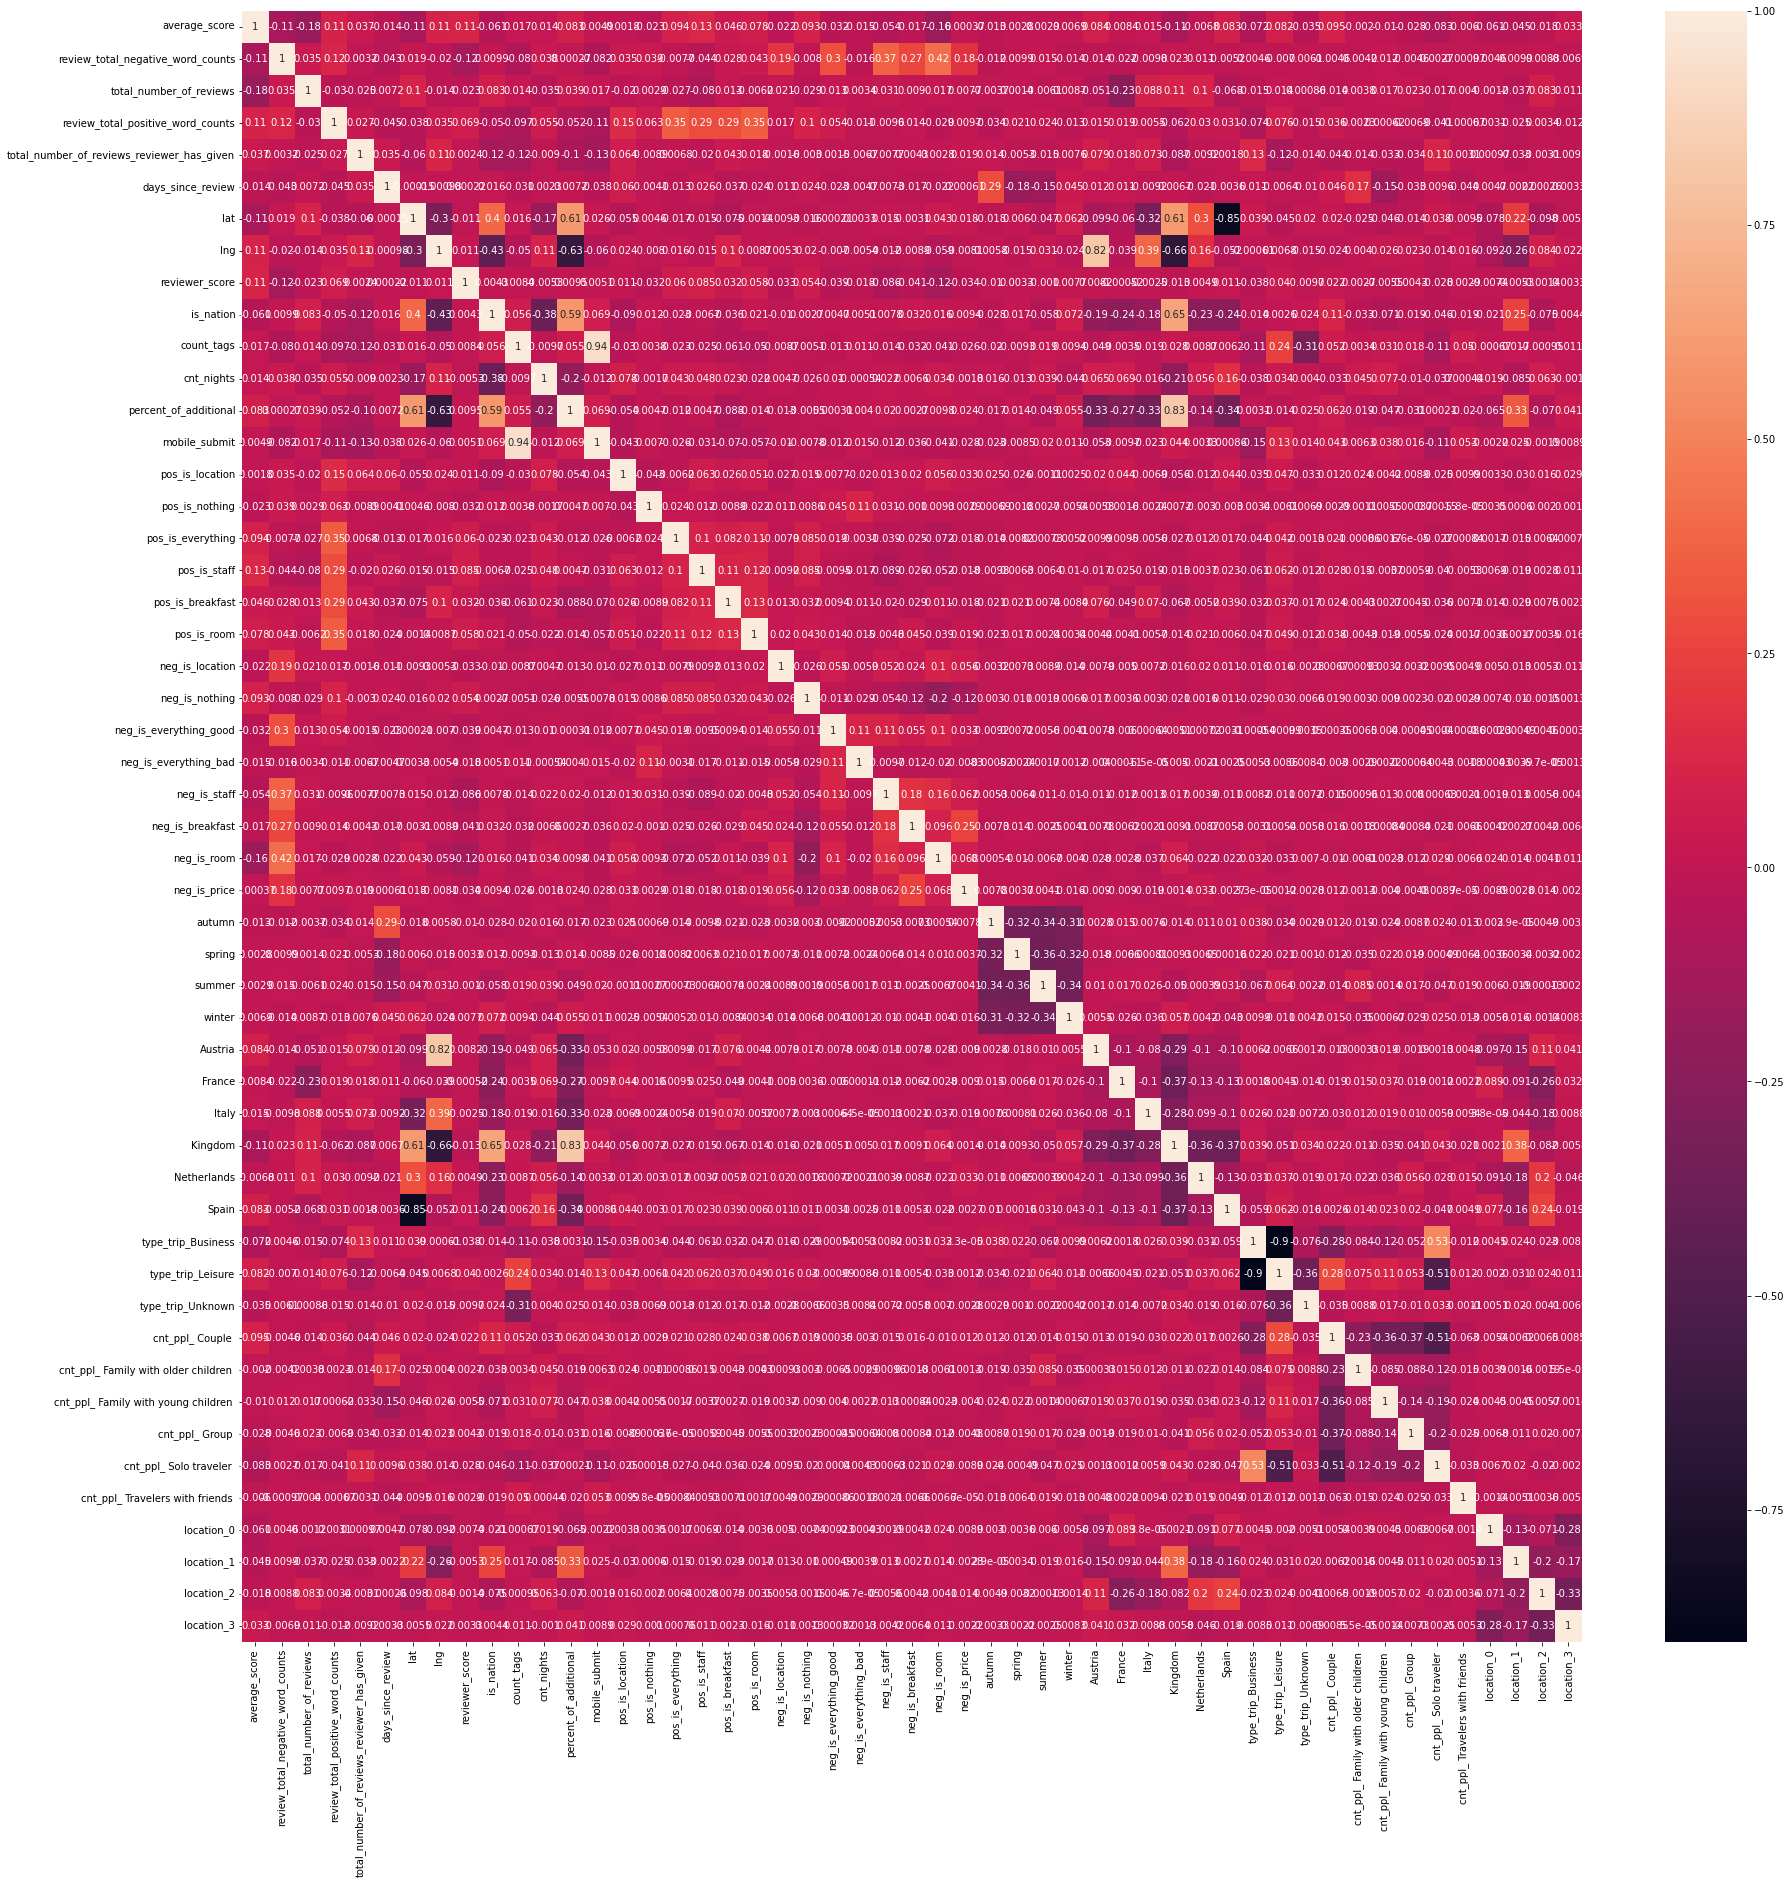

In [831]:
plt.figure(figsize=(30, 30))
sns.heatmap(data_cleaned.drop('sample', axis=1).corr(), annot=True)

Признаков слишком много. Из-за этого неудобно ориентироваться в таблице. Лучше напишем функцию, с помощью которой найдём скоррелированные признаки.

In [832]:
def show_corr(data):
    """corr

    Args:
        data (pd.DataFrame): Наш датасет
    """
    i = 0
    corr_matr = data.corr()
    corr_index = corr_matr.index
    # Пробегаемся по таблице корреляции сверху вниз до главной диагонали
    for col in corr_matr.columns:
        for j in range(i):
            corr = corr_matr.loc[corr_index[j], col]
            # Если корреляция между признаками по модулю больше или равна 0.6, то выведем эти признаки
            if  corr >= 0.6 or corr <= -0.6:
                print(corr_index[j],' ',col,': ', corr)
        i += 1


show_corr(data_cleaned.drop('sample', axis=1))

lat   percent_of_additional :  0.6054978536257843
lng   percent_of_additional :  -0.6275741410718441
count_tags   mobile_submit :  0.9385163292346771
lng   Austria :  0.8160813899258563
lat   Kingdom :  0.6110819110909831
lng   Kingdom :  -0.6627484411140814
is_nation   Kingdom :  0.6515763590988817
percent_of_additional   Kingdom :  0.8269932025974823
lat   Spain :  -0.8456523969260938
type_trip_Business   type_trip_Leisure :  -0.9040505023837011


Удалим фичи "type_trip_Business", "lat" и "lng", т.к они сильно коррелируют с другими признаками.

In [833]:
data_cleaned.drop(['lng', 'lat', 'type_trip_Business'], axis=1, inplace=True)

Корреляцию признаков "count_tags" и "mobile_submit" проверим биссериальным тестом, т.к. один из них является бинарным, а другой количественным. То же самое сделаем и с признаками "Kingdom" и "percent_of_additional"

In [834]:
print('corr mobile_submit and count_tags: ' , pointbiserialr(data_cleaned['mobile_submit'], data_cleaned['count_tags']))
print('corr Kingdom and percent_of_additional: ' , pointbiserialr(data_cleaned['Kingdom'], data_cleaned['percent_of_additional']))

corr mobile_submit and count_tags:  PointbiserialrResult(correlation=0.9385163292363776, pvalue=0.0)
corr Kingdom and percent_of_additional:  PointbiserialrResult(correlation=0.8269932025975304, pvalue=0.0)


Удалим "count_tags" и "Kingdom" из-за высокой корреляции

In [835]:
data_cleaned.drop('Kingdom', axis=1, inplace=True)

In [836]:
#Удалим 'count_tags' из-за высокой корреляции
data_cleaned.drop('count_tags', axis=1, inplace=True)

In [837]:
# уберём удалённые признаки из списка с количественными признаками
for elem in ['lng', 'lat', 'count_tags']:
    kol_features.remove(elem)


In [838]:
kol_features

['average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'days_since_review',
 'cnt_nights',
 'percent_of_additional']

Снова проверим корреляцию.

In [839]:
show_corr(data_cleaned.drop('sample', axis=1))

Теперь сильно скоррелированных признаков нет!

# Преобразование признаков

In [841]:
data_cleaned.head(3)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,sample,reviewer_score,is_nation,cnt_nights,...,cnt_ppl_ Couple,cnt_ppl_ Family with older children,cnt_ppl_ Family with young children,cnt_ppl_ Group,cnt_ppl_ Solo traveler,cnt_ppl_ Travelers with friends,location_0,location_1,location_2,location_3
0,8.1,52,16670,62,1,13,0,0.0,0,2,...,1,0,0,0,0,0,0,0,0,1
1,8.6,10,5018,0,7,234,0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,8.3,3,351,5,15,616,0,0.0,0,1,...,0,0,0,0,1,0,0,0,1,1


In [842]:
data = data_cleaned

Сначала нормализуем количественные признаки, а потом стандартизируем их

In [843]:
data[kol_features] = MinMaxScaler().fit_transform(data[kol_features])
data[kol_features] = StandardScaler().fit_transform(data[kol_features])

In [844]:
data.nunique(dropna=False)

average_score                                   34
review_total_negative_word_counts              402
total_number_of_reviews                       1142
review_total_positive_word_counts              365
total_number_of_reviews_reviewer_has_given     198
days_since_review                              731
sample                                           2
reviewer_score                                  38
is_nation                                        2
cnt_nights                                      32
percent_of_additional                         1459
mobile_submit                                    2
pos_is_location                                  2
pos_is_nothing                                   2
pos_is_everything                                2
pos_is_staff                                     2
pos_is_breakfast                                 2
pos_is_room                                      2
neg_is_location                                  2
neg_is_nothing                 

In [845]:
data.query('sample == 1')

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,sample,reviewer_score,is_nation,cnt_nights,...,cnt_ppl_ Couple,cnt_ppl_ Family with older children,cnt_ppl_ Family with young children,cnt_ppl_ Group,cnt_ppl_ Solo traveler,cnt_ppl_ Travelers with friends,location_0,location_1,location_2,location_3
128935,0.004322,-0.523386,-0.323689,-0.631903,-0.014957,0.845286,1,10.0,1,-0.218905,...,1,0,0,0,0,0,0,0,0,1
128936,-0.178149,-0.523386,-0.596790,-0.723632,0.619176,-0.724730,1,6.3,1,-0.825704,...,1,0,0,0,0,0,0,0,1,0
128937,0.916681,-0.422344,-1.008815,-0.815361,0.619176,-0.313080,1,7.5,0,0.387895,...,0,0,0,0,1,0,0,0,0,1
128938,-1.637923,-0.624428,-0.922096,-0.310851,0.075634,1.563282,1,10.0,0,-0.825704,...,0,0,0,0,1,0,1,0,0,0
128939,0.186794,-0.489705,2.088922,0.101931,0.256814,0.773487,1,9.6,0,2.208293,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,1.099153,-0.624428,-0.917781,-0.356715,0.256814,-1.189034,1,8.8,0,-0.218905,...,0,0,0,1,0,0,0,1,1,0
515734,0.004322,-0.624428,0.206982,3.450048,-0.558499,-0.877903,1,9.2,0,0.994694,...,1,0,0,0,0,0,0,0,1,1
515735,-2.915225,-0.220259,0.002911,-0.402580,1.253309,0.902726,1,8.3,0,-0.825704,...,0,0,0,0,1,0,0,0,0,1
515736,-0.543093,-0.624428,-0.507914,-0.540174,1.887442,-1.342206,1,9.2,0,-0.218905,...,0,0,0,0,1,0,0,1,1,0


# Построение модели

In [846]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [847]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [848]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 46), (386487, 46), (386487, 45), (309189, 45), (77298, 45))

In [849]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [850]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [851]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


In [866]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12687793132333916


<AxesSubplot:>

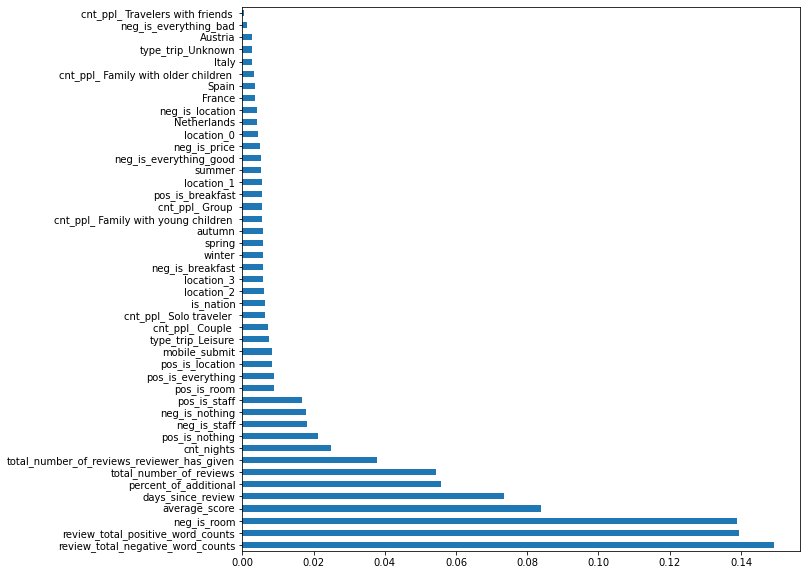

In [854]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(45).plot(kind='barh')

In [855]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,is_nation,cnt_nights,percent_of_additional,...,cnt_ppl_ Couple,cnt_ppl_ Family with older children,cnt_ppl_ Family with young children,cnt_ppl_ Group,cnt_ppl_ Solo traveler,cnt_ppl_ Travelers with friends,location_0,location_1,location_2,location_3
1925,0.551737,0.419674,-0.807764,0.331254,-0.467909,-0.911409,0.0,1,-0.218905,1.677279,...,1,0,0,0,0,0,0,0,1,0
41820,0.004322,1.699542,0.503381,5.743279,-0.558499,-1.399646,0.0,0,2.208293,0.346105,...,0,0,0,1,0,0,0,0,0,1
58367,-2.002867,-0.085537,0.373086,-0.631903,0.166224,1.295230,0.0,1,0.994694,0.528953,...,0,0,0,1,0,0,1,0,0,1
111970,-1.455451,-0.051856,-0.078631,-0.815361,-0.377318,0.242170,0.0,1,-0.218905,-0.035187,...,0,0,0,0,1,0,1,0,1,0
127587,-0.543093,0.689120,-0.655466,-0.310851,1.615671,-0.202987,0.0,0,-0.218905,-1.663135,...,0,1,0,0,0,0,0,0,1,1
39024,-0.178149,-0.456025,-0.523877,-0.356715,-0.558499,-0.360946,0.0,0,0.387895,-0.577960,...,1,0,0,0,0,0,0,0,1,1
112416,1.281624,0.183909,0.831707,0.056066,0.437995,-1.236900,0.0,0,-0.218905,-0.013313,...,0,0,1,0,0,0,0,1,0,0
45702,1.281624,3.181494,0.491301,-0.127392,-0.558499,1.429256,0.0,0,-0.218905,-0.990358,...,0,0,0,1,0,0,0,0,0,1
115869,0.369266,0.183909,0.797623,0.101931,0.800357,0.668181,0.0,0,-0.825704,0.012742,...,0,0,0,0,1,0,0,0,1,1
112406,0.551737,-0.085537,1.075039,0.147796,-0.196138,1.142058,0.0,0,0.387895,-0.455473,...,1,0,0,0,0,0,0,0,0,1


In [856]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [857]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [858]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.2s finished


In [859]:
predict_submission

array([8.594, 7.238, 8.107, ..., 8.417, 9.65 , 6.849])

In [860]:
list(sample_submission)

['reviewer_score', 'id']

In [861]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.594,488440
1,7.238,274649
2,8.107,374688
3,9.760,404352
4,9.390,451596
5,8.923,302161
6,8.090,317079
7,7.422,13963
8,8.447,159785
9,7.922,195089
